In [64]:
# =============================
# 1️⃣ Import Required Libraries
# =============================
import os

# =============================
# 2️⃣ Set Repository Folder Name and GitHub URL
# =============================
repo_folder = "Final_ML_project"  # Folder name on Colab
git_repo = "https://github.com/noor12155221/FINAL-ML-Project.git"  # GitHub repository URL

# =============================
# 3️⃣ Remove Existing Folder (if any) to Avoid Conflicts
# =============================
if os.path.exists(repo_folder):
    print(f"Found existing folder '{repo_folder}', removing it...")
    !rm -rf {repo_folder}

# =============================
# 4️⃣ Clone the GitHub Repository
# =============================
print(f"Cloning repository into '{repo_folder}'...")
!git clone {git_repo} {repo_folder}

# =============================
# 5️⃣ Change Directory to the Repository Folder
# =============================
%cd {repo_folder}
print(f"Current working directory: {os.getcwd()}")

# =============================
# 6️⃣ List Repository Files
# =============================
print("Files in repository:")
!ls

Cloning repository into 'Final_ML_project'...
Cloning into 'Final_ML_project'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 144 (delta 64), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (144/144), 586.46 KiB | 3.26 MiB/s, done.
Resolving deltas: 100% (64/64), done.
/content/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project
Current working directory: /content/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project/Final_ML_project
Files in repository:
data  notebook	README.md  README.Md  results


In [65]:
import pandas as pd

data = pd.read_csv('/content/Final_ML_project/data/heart.csv')
print(data.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [66]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

# data_path = "/content/Final_ML_project/data/heart.csv"

# df = pd.read_csv(data_path)

# print(df.shape)
# print(df.dtypes)

# target = df.columns[-1]

# X = df.drop(columns=[target])
# y = df[target]

# num_cols = X.select_dtypes(include=np.number).columns
# cat_cols = X.select_dtypes(exclude=np.number).columns


# # Split
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].mean())
# X_test[num_cols] = X_test[num_cols].fillna(X_train[num_cols].mean())


# df.to_csv('/content/Final_ML_project/data/heart_processed.csv', index=False)


# for col in cat_cols:
#     X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
#     X_test[col] = X_test[col].fillna(X_train[col].mode()[0])

# X_train = pd.get_dummies(X_train, drop_first=True)
# X_test = pd.get_dummies(X_test, drop_first=True)

# X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# print(X_train.shape)
# print(X_test.shape)
# Part 2: EDA & Preprocessing (Compact Printing)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️⃣ Load Data
data_path = "/content/Final_ML_project/data/heart.csv"
df = pd.read_csv(data_path)

print(f"Dataset shape: {df.shape}")
target = df.columns[-1]
print(f"Target variable: {target}")

# 2️⃣ Features & Target
X = df.drop(columns=[target])
y = df[target]

num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns
print(f"Numerical columns: {list(num_cols)}")
print(f"Categorical columns: {list(cat_cols)}")

# 3️⃣ Split Data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4️⃣ Handle Missing Values
X_train[num_cols] = X_train[num_cols].fillna(X_train[num_cols].mean())
X_test[num_cols] = X_test[num_cols].fillna(X_train[num_cols].mean())

for col in cat_cols:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_train[col].mode()[0])

# 5️⃣ One-Hot Encoding
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# 6️⃣ Feature Scaling
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 7️⃣ Save Processed Dataset
df_processed = pd.concat([X_train, y_train.reset_index(drop=True)], axis=1)
df_processed.to_csv('/content/Final_ML_project/data/heart_processed.csv', index=False)

# 8️⃣ Print final shapes
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

Dataset shape: (1025, 14)
Target variable: target
Numerical columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Categorical columns: []
X_train: (820, 13), X_test: (205, 13), y_train: (820,), y_test: (205,)


In [67]:

# Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
###########################################
import os
os.makedirs("results/plots", exist_ok=True)
###########################################
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




# Prepare X and y
X = df[['age']]
y = df['chol']

# Feature Scaling

# Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling without Data Leakage
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R2 Score:", r2)




Mean Squared Error (MSE): 3362.1322610340467
Root Mean Squared Error (RMSE): 57.98389656649548
R2 Score: 0.017550127896313716


In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:

# Classification Task: Logistic Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.makedirs("results/plots", exist_ok=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score



#  Features & Target
X = df.drop("target", axis=1)
y = df["target"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Initialize & Train Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Print Results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("\nConfusion Matrix:")
print(cm)

with open("results/logistic_regression_metrics.txt", "w") as f:
    f.write(f"Accuracy: {accuracy}\n")
    f.write(f"Precision: {precision}\n")
    f.write(f"Recall: {recall}\n")
    f.write(f"Confusion Matrix:\n{cm}\n")



Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902

Confusion Matrix:
[[73 29]
 [13 90]]


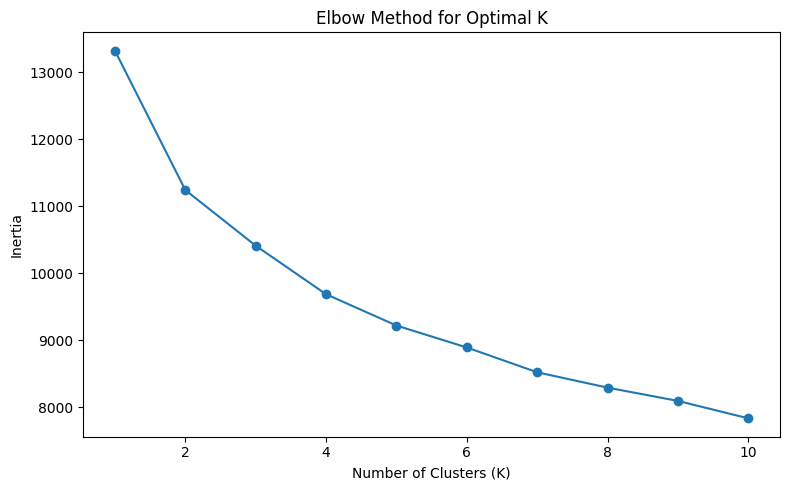

Silhouette Score: 0.1700813691485787


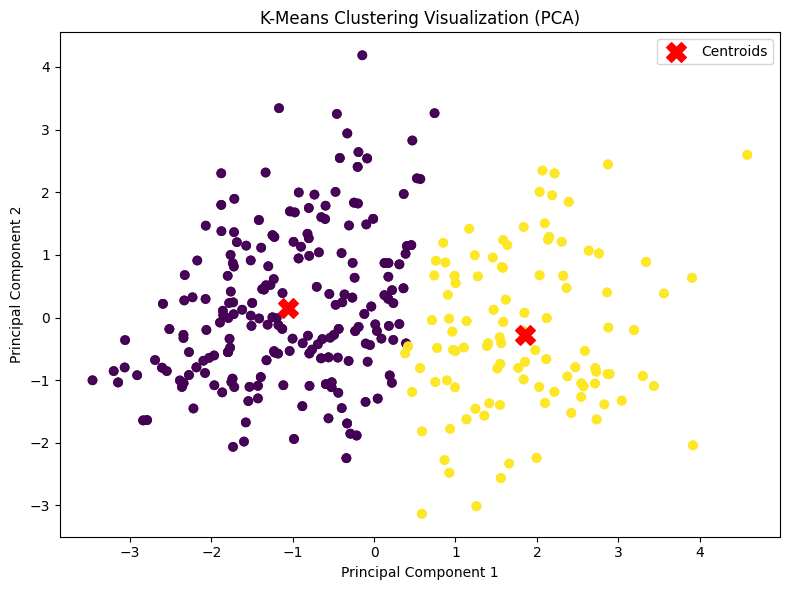

In [70]:
# ===============================
# K-Means Clustering (Final Version)
# ===============================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ===============================
# 1. Create folders
# ===============================
os.makedirs("results/plots", exist_ok=True)

# ===============================
# 2. Prepare Data (WITHOUT labels)
# ===============================
# X_cluster should contain only features (no target)
X_cluster = X.copy()

# ===============================
# 3. Feature Scaling (IMPORTANT)
# ===============================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# ===============================
# 4. Elbow Method
# ===============================
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.tight_layout()
plt.savefig("results/plots/elbow_curve.png")
plt.show()

# ===============================
# 5. Fit K-Means with Optimal K
# ===============================
optimal_k = 2  # chosen based on elbow method

kmeans = KMeans(
    n_clusters=optimal_k,
    random_state=42,
    n_init=10
)
cluster_labels = kmeans.fit_predict(X_scaled)

# ===============================
# 6. Silhouette Score
# ===============================
sil_score = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", sil_score)

with open("results/clustering_results.txt", "w") as f:
    f.write(f"Optimal K: {optimal_k}\n")
    f.write(f"Silhouette Score: {sil_score}\n")

# ===============================
# 7. PCA for Visualization
# ===============================
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# ===============================
# 8. Cluster Visualization (Final Plot)
# ===============================
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=cluster_labels,
    cmap="viridis",
    alpha=0.7
)

# Plot centroids
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    c="red",
    s=200,
    marker="X",
    label="Centroids"
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering Visualization (PCA)")
plt.legend()
plt.tight_layout()
plt.savefig("results/plots/kmeans_pca.png")
plt.show()
